In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
houses = pd.read_csv('houses.csv')

In [0]:
cols = ['Transaction unique identifier','Price','Date of Transfer','Postcode','Property Type','Old/New','Duration','PAON','SAON','Street','Locality','Town/City','District','Country','PPDCategory Type','Record Status - monthly file only']
houses = pd.read_csv('houses.csv',header=None,names = cols)

In [7]:
houses.head()

,Transaction unique identifier,Price,Date of Transfer,Postcode,Property Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,Country,PPDCategory Type,Record Status - monthly file only
0,{02A6460F-C1F3-4977-B7ED-2A77C79302AE},52000,2001-12-07 00:00,DE6 1BL,S,N,F,1A,NaN,OLD HILL,ASHBOURNE,ASHBOURNE,DERBYSHIRE DALES,DERBYSHIRE,A,A
1,{5EEB0C41-09F5-4BDF-A73E-A4E72E20BFC4},57000,2003-09-12 00:00,B36 0RA,T,N,F,44,NaN,GREENFINCH ROAD,BIRMINGHAM,BIRMINGHAM,SOLIHULL,WEST MIDLANDS,A,A
2,{09975216-3588-418C-B6C5-A5704B0E77DE},69500,2005-12-21 00:00,OL16 2XR,T,N,L,143,NaN,BELFIELD ROAD,ROCHDALE,ROCHDALE,ROCHDALE,GREATER MANCHESTER,A,A
3,{44CB83B9-0EC3-48D4-9B8D-B34D13D3C09E},84000,2001-01-31 00:00,SN1 4LJ,T,N,F,34,NaN,KINGSHILL ROAD,SWINDON,SWINDON,SWINDON,SWINDON,A,A
4,{74828706-CBFC-406D-B7B6-394B5863E22E},110000,1998-02-27 00:00,OX3 8AJ,S,N,F,62,NaN,WHARTON ROAD,HEADINGTON,OXFORD,OXFORD,OXFORDSHIRE,A,A


#Statistics for the price of the property

In [8]:
houses.Price.describe().astype(int)


count      100000
mean       174386
std        351463
min           150
25%         74000
50%        129000
75%        207000
max      48465717
Name: Price, dtype: int64

# HISTOGRAMS :

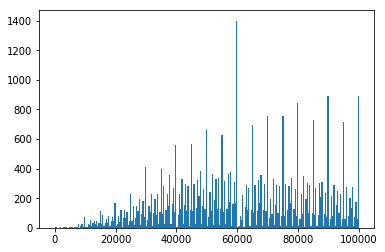

In [9]:
houses['Price'].hist(bins = 250,range = [1,100000],grid = False)

## OBSERVATION :

Due to a large no of rows , the bin value needs to be changed. It has to be n=modified according to no of data , i.e. , equal to square root(100000).

On setting these values properly, the histograms can be made more informative.

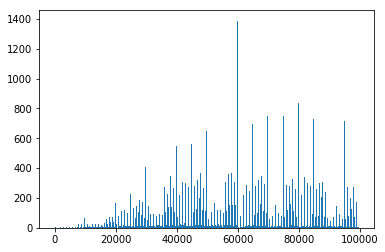

In [10]:
y, x, _ = plt.hist(houses['Price'],bins=range(1,100000,250))
#yticks(np.arange(100,50000000, step=2000))
plt.show()

In [11]:
print(y.max())

1388.0


In [0]:
houses['Flag'] = houses.District.str.contains('LONDON')

In [14]:
houses.head()


,Transaction unique identifier,Price,Date of Transfer,Postcode,Property Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,Country,PPDCategory Type,Record Status - monthly file only,Flag
0,{02A6460F-C1F3-4977-B7ED-2A77C79302AE},52000,2001-12-07 00:00,DE6 1BL,S,N,F,1A,NaN,OLD HILL,ASHBOURNE,ASHBOURNE,DERBYSHIRE DALES,DERBYSHIRE,A,A,False
1,{5EEB0C41-09F5-4BDF-A73E-A4E72E20BFC4},57000,2003-09-12 00:00,B36 0RA,T,N,F,44,NaN,GREENFINCH ROAD,BIRMINGHAM,BIRMINGHAM,SOLIHULL,WEST MIDLANDS,A,A,False
2,{09975216-3588-418C-B6C5-A5704B0E77DE},69500,2005-12-21 00:00,OL16 2XR,T,N,L,143,NaN,BELFIELD ROAD,ROCHDALE,ROCHDALE,ROCHDALE,GREATER MANCHESTER,A,A,False
3,{44CB83B9-0EC3-48D4-9B8D-B34D13D3C09E},84000,2001-01-31 00:00,SN1 4LJ,T,N,F,34,NaN,KINGSHILL ROAD,SWINDON,SWINDON,SWINDON,SWINDON,A,A,False
4,{74828706-CBFC-406D-B7B6-394B5863E22E},110000,1998-02-27 00:00,OX3 8AJ,S,N,F,62,NaN,WHARTON ROAD,HEADINGTON,OXFORD,OXFORD,OXFORDSHIRE,A,A,False


# Notation :
1 :  Inside London 

0 :  Outside London

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5fa2077d30>,
      dtype=object)

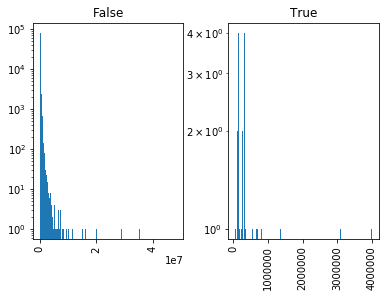

In [15]:
houses['Price'].hist(by = houses.Flag,bins = 200 , log = True)

In [16]:
houses.groupby('Flag').mean() # Average Prices for regions inside and outside London

,Price
Flag,
False,174269.645937
True,578089.655172


# Is Real State more Expensive in London ?

***ANS:*** Since avg price in LONDON is greater than the regions outside it , it implies the statement is **TRUE**. 

# Average Price per Year

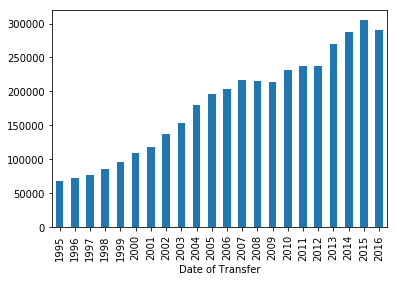

In [17]:
houses['Date of Transfer'] = pd.to_datetime(houses['Date of Transfer'])
houses.groupby(houses['Date of Transfer'].dt.year).Price.mean().plot(kind = 'bar')